# Q1. Predicting housing prices

In this problem, you will generate models for predicting house prices from given house features. The file “house_prices.txt” contains the data.

There are four features used in this regression: 

* one binary feature (whether or not the house has covered parking)
* one numerical feature (size, measure in thousands of square meters)
* two categorical features (architectural style and location)

Each of the categorial features is represented as a vector of size 3. This gives us feature vectors of size 8 in total for each house. 200 examples are given in the training set.

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
%%bash

gdown 1hLxbWVrnmSnZDGjvu8HeQex6ezbXeLB6

Downloading...
From: https://drive.google.com/uc?id=1hLxbWVrnmSnZDGjvu8HeQex6ezbXeLB6
To: /content/house_prices.txt
100%|██████████| 6.08k/6.08k [00:00<00:00, 9.16MB/s]


In [ ]:
DATA_DIR = pathlib.Path("/content")

In [ ]:
features = pd.read_csv(
    DATA_DIR / "house_prices.txt",
    delimiter = "\t",
    skiprows=[0, 1, 2, 3, 4],
    header=None,
    usecols=[0, 1, 2, 3, 4, 6, 7, 8],
    names=["parking", "sq_meters", "art_deco", "bungalow", "colonial", "west", "east", "north"],
    dtype=np.float32
)

target = pd.read_csv(
    DATA_DIR / "house_prices.txt",
    delimiter = "\t",
    skiprows=[0, 1, 2, 3, 4],
    header=None,
    usecols=[5],
    names=["price"],
    dtype=np.float32
)


In [ ]:
features.head()

,parking,sq_meters,art_deco,bungalow,colonial,west,east,north
0,-1.0,0.1275,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.1100,1.0,0.0,0.0,1.0,0.0,0.0
2,-1.0,0.1375,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.1975,0.0,1.0,0.0,0.0,0.0,1.0
4,-1.0,0.1200,0.0,0.0,1.0,1.0,0.0,0.0


## a) Split the dataset into training and testing sets

Split the dataset into training and testing sets. Keep 80% of the data for training and 20% of the data for testing.

In [ ]:
from sklearn import datasets, model_selection, preprocessing
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    features, target, test_size=0.2)
#scaler = preprocessing.StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

## b) Train a linear regression model



In [ ]:
N = X_train.shape[0]
A = np.column_stack((np.ones(N),X_train))
"""theta = np.linalg.solve(A.T@A,A.T@y_train)
y_hat = A @ theta"""

'theta = np.linalg.solve(A.T@A,A.T@y_train)\ny_hat = A @ theta'

## c) Assess the performance of your linear regression model


In [ ]:
def rms(y, y_hat):
    return np.sqrt(np.mean(np.square(y - y_hat)))

def linear_regression(X, y):
    return np.linalg.solve(X.T @ X, X.T @ y) 
def AvgError(yhat,y):
  return np.average(np.absolute(yhat-y)/y)
def MSE(y,yhat):
  return np.square(np.subtract(y_train,y_hat)).mean()
theta = linear_regression(A,y_train)
y_hat = A @ theta
print(rms(y_train,y_hat))
print("The mse: " ,MSE(y_train,y_hat))

price    0.026601
dtype: float64
The mse:  price    0.000708
dtype: float64


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## d) Build a neural network to predict house prices 


In [ ]:
import torch
from torch import nn, optim, utils

In [ ]:
train_features_tensor = torch.from_numpy(X_train.to_numpy().astype(np.float32))
train_target_tensor = torch.from_numpy(y_train.to_numpy().astype(np.float32))

train_dataset = utils.data.TensorDataset(
    train_features_tensor,
    train_target_tensor
)

test_features_tensor = torch.from_numpy(X_test.to_numpy().astype(np.float32))
test_target_tensor = torch.from_numpy(y_test.to_numpy().astype(np.float32))
    
test_dataset = utils.data.TensorDataset(
    test_features_tensor,
    test_target_tensor
)

train_dataloader = utils.data.DataLoader(
    train_dataset,
    batch_size=40,
    shuffle=True
)

test_dataloader = utils.data.DataLoader(
    test_dataset,
    batch_size=40,
    shuffle=False
)

In [ ]:
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1)        
) 

## e) Train your neural network using gradient descent


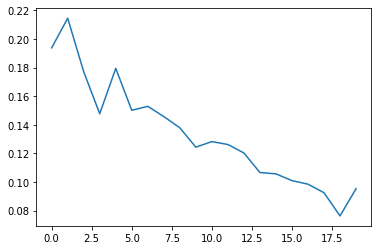

In [ ]:
# training loop
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.002)
epochs = 20

ls = []
for epoch in range(epochs):
  for batch_idx, (feature,label) in enumerate(train_dataloader):
    optimizer.zero_grad()      # zero out the gradient for next iteration
    X = feature
    y= label
    z = model(X)
    loss = loss_fn(z,y)
    loss.backward()            # computes the gradient
    optimizer.step()           # update params by -lr * gradient
  ls.append(loss.item())

plt.figure()
plt.plot(ls)



## f) Assess the performance of your neural network


In [ ]:
rmsTot = 0 
mse = 0
for batch_idx, (feature,label) in enumerate(test_dataloader):
  y_hat = model(feature)
  rmsTot += rms(label.detach().numpy(),y_hat.detach().numpy())
print("rms test :",rmsTot / len(test_dataloader))

for batch_idx, (feature,label) in enumerate(train_dataloader):
  y_hat = model(feature)
  rmsTot += rms(label.detach().numpy(),y_hat.detach().numpy())

print("rms train :",rmsTot / len(train_dataloader))

rms test : 0.28574955463409424
rms train : 0.3518042340874672


# Q2. Classification


In [ ]:
%%bash

gdown 1_n5odu1KSpBAqO_Ddbqy2Ty0mG12Dr0A
gdown 1C7GK_uY0srlUdLfHfGa4IZcfthmmdROr

Downloading...
From: https://drive.google.com/uc?id=1_n5odu1KSpBAqO_Ddbqy2Ty0mG12Dr0A
To: /content/spiral_features.npy
100%|██████████| 4.93k/4.93k [00:00<00:00, 10.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1C7GK_uY0srlUdLfHfGa4IZcfthmmdROr
To: /content/spiral_target.npy
100%|██████████| 428/428 [00:00<00:00, 1.67MB/s]


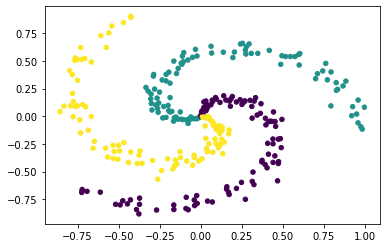

In [ ]:
features = (np.load(DATA_DIR / "spiral_features.npy")
              .astype(np.float32))
target = np.load(DATA_DIR / "spiral_target.npy")

# visualize the data
plt.scatter(features[:, 0], features[:, 1], c=target, s=20)
plt.show()

## a) Split the dataset into training and testing sets


In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    features, target, test_size=0.2)
print(X_train.shape)

(240, 2)


## b) Train a logistic regression model


## c) Assess the performance of your logistic regression model

In [ ]:
train_features_tensor = torch.from_numpy(X_train.astype(np.float32))
train_target_tensor = torch.from_numpy(y_train.astype(np.int64))

train_dataset = utils.data.TensorDataset(
    train_features_tensor,
    train_target_tensor
)

test_features_tensor = torch.from_numpy(X_test)
test_target_tensor = torch.from_numpy(y_test)
    
test_dataset = utils.data.TensorDataset(
    test_features_tensor,
    test_target_tensor
)

train_dataloader = utils.data.DataLoader(
    train_dataset,
    batch_size=40,
    shuffle=True
)

test_dataloader = utils.data.DataLoader(
    test_dataset,
    batch_size=40,
    shuffle=False
)

In [ ]:
print(train_features_tensor.shape)

torch.Size([240, 2])


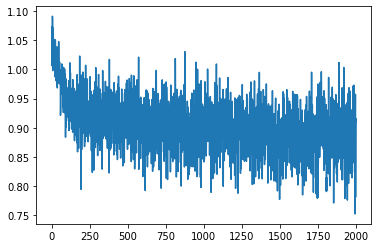

In [ ]:
input = train_features_tensor.shape[1]
model3 = nn.Sequential(
    nn.Linear(input,3),
    nn.Softmax(dim =1)      
) 

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model3.parameters(), lr=0.1)
epochs = 2000

ls = []
for epoch in range(epochs):
  total_loss = 0
  for batch_idx, (feature,label) in enumerate(train_dataloader):
    optimizer.zero_grad()      # zero out the gradient for next iteration
    X = feature
    y= label
    z = model3(X)
    loss = loss_fn(z,y)
    loss.backward()            # computes the gradient
    optimizer.step()           # update params by -lr * gradient
  ls.append(loss.item())

plt.figure()
plt.plot(ls)


In [ ]:
accuracy = 0
for batch_idx, (feature,label) in enumerate(test_dataloader):
  y_hat = model3(feature)
  pred =  torch.argmax(y_hat, dim=1)
  accuracy += torch.sum((pred == label)) / label.shape[0]
  print(accuracy)
print('accuracy Test: ', (accuracy.item()*100)/len(test_dataloader), '%')

accuracy = 0
for batch_idx, (feature,label) in enumerate(train_dataloader):
  y_hat = model3(feature)
  pred =  torch.argmax(y_hat, dim=1)
  accuracy += torch.sum((pred == label)) / label.shape[0]
print('accuracy Train: ', (accuracy.item()*100)/len(train_dataloader), '%')


tensor(0.5000)
tensor(1.0500)
accuracy Test:  52.49999761581421 %
accuracy Train:  67.49999523162842 %


## d) Build a neural network classifier 


In [ ]:
model2 = nn.Sequential(
    nn.Linear(2, 100),
    nn.ReLU(),
    nn.Linear(100, 3),
    nn.Softmax(dim =1)      
) 

## e) Assess the performance of your neural network


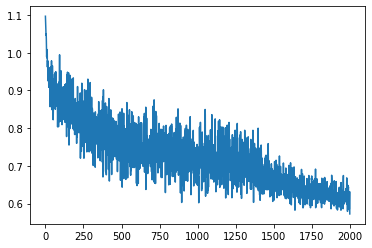

In [ ]:
# training loop
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model2.parameters(), lr=0.1)
epochs = 2000

ls = []
for epoch in range(epochs):
  total_loss = 0
  for batch_idx, (feature,label) in enumerate(train_dataloader):
    optimizer.zero_grad()      # zero out the gradient for next iteration
    X = feature
    y= label
    z = model2(X)
    loss = loss_fn(z,y)
    loss.backward()            # computes the gradient
    optimizer.step()           # update params by -lr * gradient
  ls.append(loss.item())

plt.figure()
plt.plot(ls)



In [ ]:
accuracy = 0
for batch_idx, (feature,label) in enumerate(test_dataloader):
  y_hat = model2(feature)
  pred =  torch.argmax(y_hat, dim=1)
  accuracy += torch.sum((pred == label)) / label.shape[0]
  print(accuracy)
print('accuracy Test: ', (accuracy.item()*100)/len(test_dataloader), '%')

accuracy = 0
for batch_idx, (feature,label) in enumerate(train_dataloader):
  y_hat = model2(feature)
  pred =  torch.argmax(y_hat, dim=1)
  accuracy += torch.sum((pred == label)) / label.shape[0]
print('accuracy Train: ', (accuracy.item()*100)/len(train_dataloader), '%')


tensor(1.)
tensor(1.9500)
accuracy Test:  97.50000238418579 %
accuracy Train:  96.2500015894572 %


## e) Interpret the confusion matrix


In [ ]:
from sklearn import metrics

In [ ]:
cf = 0 
for batch_idx, (feature,label) in enumerate(test_dataloader):
  y_hat = model2(feature)
  pred =  torch.argmax(y_hat, dim=1)
  cf += metrics.confusion_matrix(label,pred)
print(cf)

cf = 0
for batch_idx, (feature,label) in enumerate(train_dataloader):
  y_hat = model2(feature)
  pred =  torch.argmax(y_hat, dim=1)
  cf += metrics.confusion_matrix(label,pred)
print(cf)

[[19  0  0]
 [ 0 15  1]
 [ 0  0 25]]
[[78  1  2]
 [ 0 78  6]
 [ 0  0 75]]


## f) Create your own deep neural network!

In [ ]:
model3 = nn.Sequential(
    nn.Linear(2, 100),
    nn.ReLU(),
    nn.Linear(100, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 3),
    nn.Softmax(dim =1)      
) 

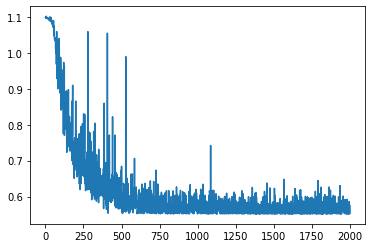

In [ ]:
# training loop
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model3.parameters(), lr=0.1)
epochs = 2000

ls = []
for epoch in range(epochs):
  for batch_idx, (feature,label) in enumerate(train_dataloader):
    optimizer.zero_grad()      # zero out the gradient for next iteration
    X = feature
    y= label
    z = model3(X)
    loss = loss_fn(z,y)
    loss.backward()            # computes the gradient
    optimizer.step()           # update params by -lr * gradient
  ls.append(loss.item())
"""    if epoch % 30 == 0:
        print(loss.item())"""

plt.figure()
plt.plot(ls)



In [ ]:
accuracy = 0
for batch_idx, (feature,label) in enumerate(test_dataloader):
  y_hat = nn.functional.softmax(model3(feature), dim=1)
  pred =  torch.argmax(y_hat, dim=1)
  accuracy += torch.sum((pred == label)) /label.shape[0] 
print('accuracy Test: ', (accuracy.item()*100)/len(test_dataloader), '%')
accuracy = 0
for batch_idx, (feature,label) in enumerate(train_dataloader):
  y_hat = nn.functional.softmax(model3(feature), dim=1)
  pred =  torch.argmax(y_hat, dim=1)
  accuracy += torch.sum((pred == label)) / label.shape[0]
print('accuracy Train: ', (accuracy.item()*100)/len(train_dataloader), '%')


accuracy Test:  97.50000238418579 %
accuracy Train:  99.16666348775227 %
